In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
auctions = pd.read_csv('auctions.csv.gzip', compression = 'gzip', dtype = {'auction_type_id':'object', 'country': np.float32, 'date': 'object', 'device_id': np.float32, 'platform' :'category', 'ref_type_id':'category', 'source_id':'category'})

In [4]:
del auctions['country']
del auctions['auction_type_id']

In [5]:
clicks = pd.read_csv('clicks.csv.gzip', compression = 'gzip')

In [6]:
clicks['advertiser_id'] = clicks['advertiser_id'].astype('category')
del clicks['action_id']
del clicks['country_code']
clicks['source_id'] = clicks['source_id'].astype('category')
del clicks['wifi_connection']


In [7]:
clicks['ref_hash'] = clicks['ref_hash'].astype(np.float32)

In [7]:
#Busco el porcentaje de subastas que terminan en clicks

In [9]:
clicksporsubasta = len(clicks)/len(auctions)

In [10]:
clicksporsubasta

0.0013464089977788416

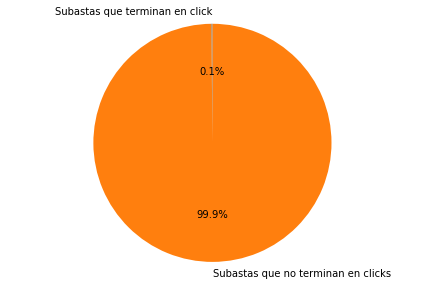

In [11]:
labels = ['Subastas que terminan en click', 'Subastas que no terminan en clicks']
sizes = [clicksporsubasta, 1 - clicksporsubasta]
explode = (0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', startangle = 90)
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [12]:
#Busco para cada platform quien es el advertiser_id principal
#Empiezo por platform 1

In [37]:
devices_platform1 = auctions[auctions['platform'] == '1']['device_id'].values

In [38]:
devices_platform1

array([  6.05959935e+18,   1.11599503e+18,   7.46385601e+18, ...,
         8.43361757e+18,   6.07411290e+18,   4.27128327e+18], dtype=float32)

In [39]:
clicks_reduced_platform1 = clicks[clicks['ref_hash'].isin(devices_platform1)]

In [40]:
clicks_reduced_platform1['advertiser_id'].value_counts()

3    25415
0       30
2       12
1        2
8        1
7        1
5        1
Name: advertiser_id, dtype: int64

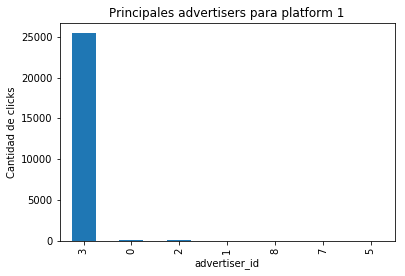

In [45]:

plt.title('Principales advertisers para platform 1')
plt.xlabel('advertiser_id')
plt.ylabel('Cantidad de clicks')
(clicks_reduced_platform1['advertiser_id'].value_counts()).plot(kind = 'bar')

#El grafico no tiene mucho sentido. El advertiser_id = 3 es el unico que se ve

In [42]:
#Ahora voy con platform2

In [43]:
devices_platform2 = auctions[auctions['platform'] == '2']['device_id'].values

In [46]:
clicks_reduced_platform2 = clicks[clicks['ref_hash'].isin(devices_platform2)]
clicks_reduced_platform2['advertiser_id'].value_counts()

3    746
0     40
8      0
7      0
5      0
2      0
1      0
Name: advertiser_id, dtype: int64

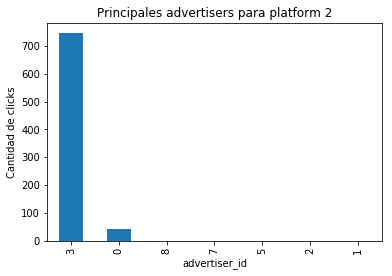

In [47]:
plt.title('Principales advertisers para platform 2')
plt.xlabel('advertiser_id')
plt.ylabel('Cantidad de clicks')
(clicks_reduced_platform2['advertiser_id'].value_counts()).plot(kind = 'bar')

#El grafico no tiene mucho sentido. El advertiser_id = 3 es el unico que se ve

In [1]:
#Ahora busco para cada día de marzo, cantidad de auctions y cantidad de clicks